## Importy

In [65]:
import keras
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from utils import *
import plotly.express as px

In [10]:
dataframes = read_csv("./datasets", 'csv')

In [11]:
res = prepare_dataframes(dataframes)

  0%|          | 0/3 [00:00<?, ?it/s]

out_hum
pressure
out_temp


In [12]:
df = get_labels(res, '2024-02-13')

In [13]:
df['rain_1h'] = df['rain_1h'].fillna(0)
df['snow_1h'] = df['snow_1h'].fillna(0)
df['total percipitation'] = df['rain_1h'] + df['snow_1h']
df['last_changed_count'] = df.groupby('last_changed')['last_changed'].transform('count')
df = df.drop_duplicates(subset=['last_changed'])
df = df.loc[:, ['last_changed', 'pressure', 'out_temp', 'out_hum', 'total percipitation']]
df = df.reset_index(drop=True)

# Tabela 1 (time, P, T, H, R)

In [14]:
df

,last_changed,pressure,out_temp,out_hum,total percipitation
0,2023-09-20 00:00:00+00:00,986.000000,15.300000,76.000000,0.00
1,2023-09-20 01:00:00+00:00,985.428571,14.528571,78.900000,0.00
2,2023-09-20 02:00:00+00:00,985.760000,14.212500,79.500000,0.00
3,2023-09-20 03:00:00+00:00,985.280000,14.041667,81.300000,0.00
4,2023-09-20 04:00:00+00:00,985.666667,13.833333,83.333333,0.25
...,...,...,...,...,...
3499,2024-02-12 19:00:00+00:00,974.777778,7.220000,85.166667,0.00
3500,2024-02-12 20:00:00+00:00,975.846154,7.020000,84.933333,0.00
3501,2024-02-12 21:00:00+00:00,976.846154,6.566667,84.033333,0.00
3502,2024-02-12 22:00:00+00:00,976.521739,6.370000,83.873913,0.00


# Tabela 2 (time, 0, -1, -2, -3...)

In [15]:
df2 = generate_data(df, 5)
df2

,time,TP t+1,Press t0,Temp t0,Hum t0,TP t0,Press t-1,Temp t-1,Hum t-1,TP t-1,...,Hum t-3,TP t-3,Press t-4,Temp t-4,Hum t-4,TP t-4,Press t-5,Temp t-5,Hum t-5,TP t-5
0,2023-09-20 05:00:00+00:00,0.0,986.217391,13.966667,83.366667,0.0,985.666667,13.833333,83.333333,0.25,...,79.500000,0.00,985.428571,14.528571,78.900000,0.00,986.000000,15.300000,76.000000,0.00
1,2023-09-20 06:00:00+00:00,0.0,986.478261,14.640000,80.100000,0.0,986.217391,13.966667,83.366667,0.00,...,81.300000,0.00,985.760000,14.212500,79.500000,0.00,985.428571,14.528571,78.900000,0.00
2,2023-09-20 07:00:00+00:00,0.0,986.739130,15.480000,75.420000,0.0,986.478261,14.640000,80.100000,0.00,...,83.333333,0.25,985.280000,14.041667,81.300000,0.00,985.760000,14.212500,79.500000,0.00
3,2023-09-20 08:00:00+00:00,0.0,986.090909,17.000000,69.840000,0.0,986.739130,15.480000,75.420000,0.00,...,83.366667,0.00,985.666667,13.833333,83.333333,0.25,985.280000,14.041667,81.300000,0.00
4,2023-09-20 09:00:00+00:00,0.0,986.200000,18.600000,61.920000,0.0,986.090909,17.000000,69.840000,0.00,...,80.100000,0.00,986.217391,13.966667,83.366667,0.00,985.666667,13.833333,83.333333,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,2024-02-12 18:00:00+00:00,0.0,974.642857,7.371429,84.830000,0.0,973.500000,7.540000,84.800000,0.00,...,83.640000,0.00,971.652174,7.860000,85.928571,0.00,971.130435,7.955556,86.000000,0.00
3494,2024-02-12 19:00:00+00:00,0.0,974.777778,7.220000,85.166667,0.0,974.642857,7.371429,84.830000,0.00,...,83.020000,0.00,972.384615,7.877778,83.640000,0.00,971.652174,7.860000,85.928571,0.00
3495,2024-02-12 20:00:00+00:00,0.0,975.846154,7.020000,84.933333,0.0,974.777778,7.220000,85.166667,0.00,...,84.800000,0.00,973.222222,7.754545,83.020000,0.00,972.384615,7.877778,83.640000,0.00
3496,2024-02-12 21:00:00+00:00,0.0,976.846154,6.566667,84.033333,0.0,975.846154,7.020000,84.933333,0.00,...,84.830000,0.00,973.500000,7.540000,84.800000,0.00,973.222222,7.754545,83.020000,0.00


# Parametry sieci

In [20]:
config = {}
config["step"] = 5
config["epsilon"] = 1e-1 
config["units 1st layer"] = 50
#config["dropout 1st layer"] = 0.2
config["units 2nd layer"] = 50
#config["dropout 2nd layer"] = 0.2
config["units 3rd layer"] = 50
config["dropout 3rd layer"] = 0.1
config["units 4th layer"] = 50
config["dropout 4th layer"] = 'None'
config["learning rate"] = 1e-5
config["optimizer"] = 'adam'
config["loss"] = 'mean_squared_error'

config["epochs"] = 100
config["batch size"] = 32

config['MSE'] = 0
config['R2'] = 0

# Transformacja danych + podział

In [18]:
def transform_data(df, step: int, epsilon: float):
    
    df = df.copy()
    df['total percipitation'] = np.log(df['total percipitation'] + epsilon)
    df2 = generate_data(df, step)
    
    return df2

In [21]:
df2 = transform_data(df, config["step"], config["epsilon"])

In [22]:
training_set = df2[df2['time'] < '2023-12-13 22:00:00+00:00']
validation_set = df2[(df2['time'] < '2024-01-13 22:00:00+00:00') & (df2['time'] >= '2023-12-13 22:00:00+00:00')]
testing_set = df2[(df2['time'] <= '2024-02-13 23:00:00+00:00') & (df2['time'] >= '2024-01-13 22:00:00+00:00') ]

In [23]:
X_train = training_set.iloc[:,2:]
y_train = training_set.iloc[:,1:2]

X_val = validation_set.iloc[:,2:]
y_val = validation_set.iloc[:,1:2]

X_test = testing_set.iloc[:,2:]
y_test = testing_set.iloc[:,1:2]

# Nazwa eksperymentu do wczytania

In [89]:
name = 'Log_T33.keras'
#Log_T11.weights.h5
#Log_T33.keras

# Wczytywanie modelu

In [90]:
loaded_model = keras.saving.load_model(f'D:/Nextcloud/Workspace/Data Science/Projekt/Wyniki/{name}')

In [91]:
#loaded_model.get_weights()

In [106]:
#loaded_model.summary()

# Predykcja

In [93]:
y_pred = loaded_model.predict(X_val)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [94]:
def invert_transformed_data(y_pred, y_val, epsilon):

    df_pred = pd.DataFrame(y_pred, columns=["TP t+1"])
    df_val = pd.DataFrame(y_val, columns=["TP t+1"])
    
    df_pred["TP t+1"] = np.exp(df_pred["TP t+1"]) - epsilon
    df_val["TP t+1"] = np.exp(df_val["TP t+1"]) - epsilon
    return df_pred, df_val

In [95]:
y_pred_inv, y_val_inv = invert_transformed_data(y_pred, y_val, config["epsilon"])

In [96]:
y_val_inv = y_val_inv.reset_index(drop=True)
y_val_inv.compare(y_pred_inv)

TP t+1          
             self     other
0    1.387779e-17  0.036162
1    1.387779e-17  0.021311
2    1.387779e-17  0.019300
3    1.387779e-17  0.018576
4    2.500000e-01  0.018151
..            ...       ...
739  4.570000e+00  0.014727
740  2.400000e-01  0.016243
741  3.700000e-01  0.015235
742  3.700000e-01  0.014990
743  4.700000e-01  0.014922

[744 rows x 2 columns]

In [97]:
y_pred_inv = y_pred_inv.rename(columns={'TP t+1':'Predicted TP'})
results = pd.concat([y_pred_inv, y_val_inv], axis=1)

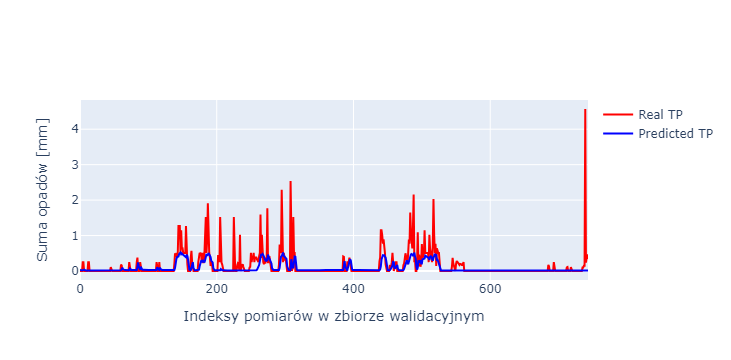

In [98]:
trace1 = go.Scatter(
    x=results.index, y=results['TP t+1'], mode='lines', name='Real TP', line=dict(color='red')
)
trace2 = go.Scatter(
    x=results.index, y=results['Predicted TP'], mode='lines', name='Predicted TP', line=dict(color='blue')
)

fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(
    xaxis_title='Indeksy pomiarów w zbiorze walidacyjnym',
    yaxis_title='Suma opadów [mm]')

fig.show()

In [99]:
MSE = mean_squared_error(y_val_inv, y_pred_inv)
r2 = r2_score(y_val_inv, y_pred_inv)
MAE = mean_absolute_error(y_val_inv, y_pred_inv)
 
print(
    f'Mean Squared Error: {MSE}\n',
    f'R2 coefficient: {r2}\n',
    f'Mean Absolute Error: {MAE}',
 )

Mean Squared Error: 0.09937685358968953
 R2 coefficient: 0.24345329165849006
 Mean Absolute Error: 0.12081800873040832


# Predykcja na zbiorze testowym


In [100]:
y_pred_test = loaded_model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [101]:
y_pred_test_inv, y_test_inv = invert_transformed_data(y_pred_test, y_test, config["epsilon"])

In [102]:
y_test_inv = y_test_inv.reset_index(drop=True)
y_test_inv.compare(y_pred_test_inv)

TP t+1          
             self     other
0    3.500000e-01  0.014950
1    5.100000e-01  0.014951
2    2.500000e-01  0.015134
3    2.100000e-01  0.015051
4    2.100000e-01  0.015057
..            ...       ...
716  1.387779e-17  0.029158
717  1.387779e-17  0.029442
718  1.387779e-17  0.029646
719  1.387779e-17  0.029702
720  1.387779e-17  0.029575

[721 rows x 2 columns]

In [103]:
y_pred_test_inv = y_pred_test_inv.rename(columns={'TP t+1':'Predicted TP'})
results_2 = pd.concat([y_pred_test_inv, y_test_inv], axis=1)

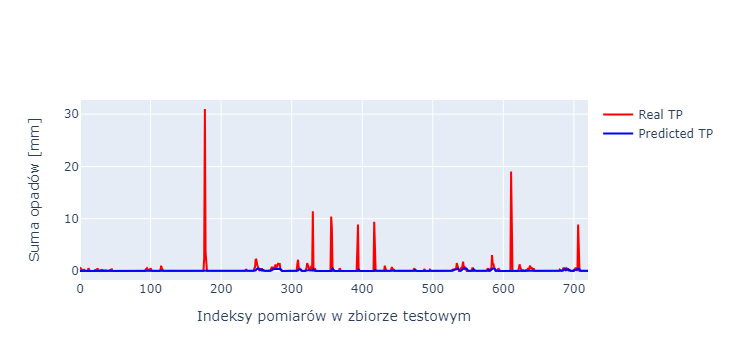

In [104]:
trace1 = go.Scatter(
    x=results.index, y=results_2['TP t+1'], mode='lines', name='Real TP', line=dict(color='red')
)
trace2 = go.Scatter(
    x=results.index, y=results_2['Predicted TP'], mode='lines', name='Predicted TP', line=dict(color='blue')
)

fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(
    xaxis_title='Indeksy pomiarów w zbiorze testowym',
    yaxis_title='Suma opadów [mm]')

fig.show()

In [105]:
MSE = mean_squared_error(y_test_inv, y_pred_test_inv)
r2 = r2_score(y_test_inv, y_pred_test_inv)
MAE = mean_absolute_error(y_test_inv, y_pred_test_inv)
 
print(
    f'Mean Squared Error: {MSE}\n',
    f'R2 coefficient: {r2}\n',
    f'Mean Absolute Error: {MAE}',
 )

Mean Squared Error: 2.7110414864783796
 R2 coefficient: -0.011218951172968783
 Mean Absolute Error: 0.27863641954080076
